# Optional Lab: Multiple Variable Linear Regression
# 2 Problem Statement

In [1]:
X_train = [2104 5 1 45; 1416 3 2 40; 852 2 1 35]
y_train = [460, 232, 178];

## 2.1 Matrix X containing our examples

In [2]:
# data is stored in numpy array/matrix
println("X Shape: $(size(X_train)), X Type: $(eltype(X_train))")
println(X_train)
println("y Shape: $(size(y_train)), y Type:$(eltype(y_train))")
println(y_train)

X Shape: (3, 4), X Type: Int64


[2104 5 1 45; 1416 3 2 40; 852 2 1 35]


y Shape: (3,), y Type:Int64


[460, 232, 178]


## 2.2 Parameter vector w, b

In [3]:
b_init = 785.1811367994083
w_init = [ 0.39133535, 18.75376741, -53.36032453, -26.42131618]
println("w_init shape: $(size(w_init)), b_init type: $(eltype(b_init))")

w_init shape: (4,), b_init type: Float64


# 3 Model Prediction With Multiple Variables
## 3.1 Single Prediction element by element

In [4]:
range(0, 9)

0:9

In [5]:
function predict_single_loop(x, w, b)
    """
    single predict using linear regression

    Args:
    x (ndarray): Shape (n,) example with multiple features
    w (ndarray): Shape (n,) model parameters    
    b (scalar):  model parameter     

    Returns:
    p (scalar):  prediction
    """
    n = size(x)[1]
    p = 0
    for i in 1:n
        pⁱ = x[i] * w[i]  
        p = p + pⁱ
    end
    p + b
end

predict_single_loop (generic function with 1 method)

In [6]:
# get a row from our training data
x_vec = X_train[1, :]
println("x_vec shape $(size(x_vec)), x_vec value: $(x_vec)")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
println("f_wb shape $(size(f_wb)), prediction: $f_wb")

x_vec shape (4,), x_vec value: [2104, 5, 1, 45]
f_wb shape (), prediction: 459.9999976194083


## 3.2 Single Prediction, vector

In [7]:
using LinearAlgebra

function predict(x, w, b)
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    x ⋅ w + b
end

predict (generic function with 1 method)

In [8]:
# get a row from our training data
x_vec = X_train[1, :]
println("x_vec shape $(size(x_vec)), x_vec value: $x_vec")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
println("f_wb shape $(size(f_wb)), prediction: $f_wb")

x_vec shape (4,), x_vec value: [2104, 5, 1, 45]
f_wb shape (), prediction: 459.9999976194083


# 4 Compute Cost With Multiple Variables

In [9]:
function compute_cost(X, y, w, b)
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = size(X)[1]
    cost = 0.0
    for i in 1:m                                
        f_wb_i = X[i, :] ⋅ w + b # (n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])^2 # scalar
    end
    cost / (2 * m) # scalar
end

compute_cost (generic function with 1 method)

In [10]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
println("Cost at optimal w : $cost")

Cost at optimal w : 1.5578904428966628e-12


# 5 Gradient Descent With Multiple Variables
## 5.1 Compute Gradient with Multiple Variables

In [11]:
function compute_gradient(X, y, w, b)
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = size(X) #(number of examples, number of features)
    dj_dw = zeros(n,)
    dj_db = 0.

    for i in 1:m                             
        err = (X[i, :] ⋅ w + b) - y[i]   
        for j in 1:n                      
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        end
        dj_db = dj_db + err
    end
    dj_dw = dj_dw / m                           
    dj_db = dj_db / m

    dj_db, dj_dw
end

compute_gradient (generic function with 1 method)

In [13]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
println("dj_db at initial w,b: $tmp_dj_db")
println("dj_dw at initial w,b: $tmp_dj_dw")

dj_db at initial w,b: -1.6739251501955248e-6
dj_dw at initial w,b: [-0.0027262357719640327, -6.271972627776752e-6, -2.217455782253334e-6, -6.92403390682254e-5]


## 5.2 Gradient Descent With Multiple Variables

In [29]:
using Printf

function gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters)
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in 1:num_iters
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i < 100000      # prevent resource exhaustion 
            append!(J_history, cost_function(X, y, w, b))
        end

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % ceil(num_iters / 10) == 0
            println("Iteration $i: Cost $(@sprintf("%.2f", J_history[end]))")
        end
    end
    w, b, J_history #return final w,b and J history for graphing
end

gradient_descent (generic function with 1 method)

In [32]:
# initialize parameters
initial_w = zero(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
println("b,w found by gradient descent: $b_final, $w_final")
m,_ = size(X_train)
for i in 1:m
    println("prediction: $(@sprintf("%.2f", X_train[i, :] ⋅ w_final + b_final)), target value: $(y_train[i])")
end

Iteration 100: Cost 696.00
Iteration 200: Cost 694.93
Iteration 300: Cost 693.87
Iteration 400: Cost 692.82
Iteration 500: Cost 691.78
Iteration 600: Cost 690.75
Iteration 700: Cost 689.72
Iteration 800: Cost 688.71
Iteration 900: Cost 687.70
Iteration 1000: Cost 686.70
b,w found by gradient descent: -0.002235407530932535, [0.20396568731883127, 0.0037491922098285375, -0.011248703878978786, -0.06586139992373717]
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


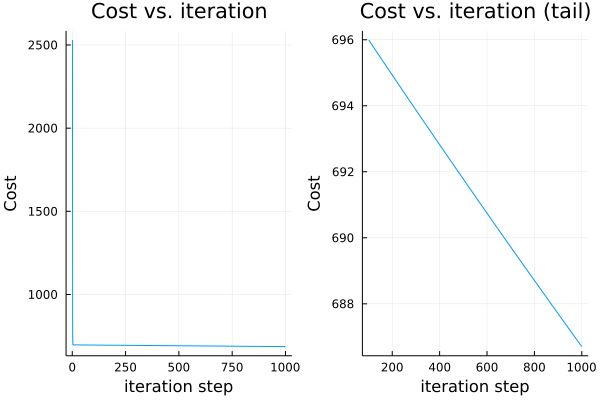

In [78]:
using Plots

plt = plot()
# plot cost versus iteration
plot1 = plot(J_hist)
title!("Cost vs. iteration")
ylabel!("Cost")
xlabel!("iteration step")

plot2 = plot(100 .+ collect(1:length(J_hist[101:end])), J_hist[101:end])
title!("Cost vs. iteration (tail)")
ylabel!("Cost")
xlabel!("iteration step")

plot!(plot1, plot2, layout=(1, 2), legend=false)